# 会员的年龄分布

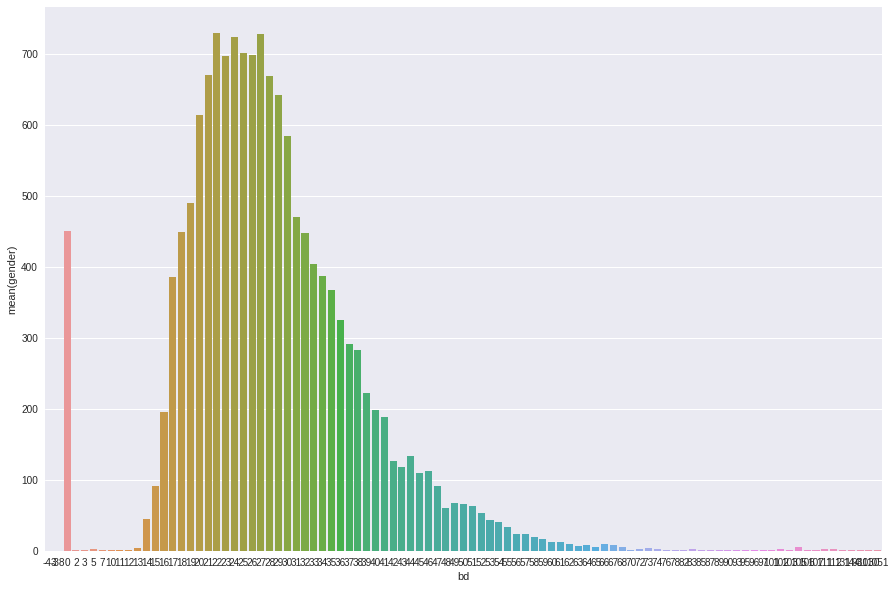

# 会员城市分布

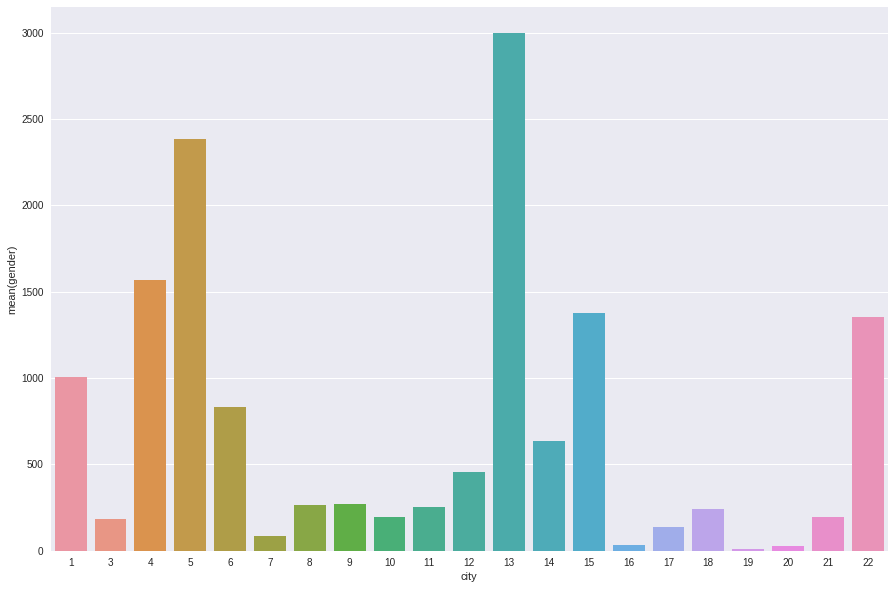

## There are: 2296320 songs; 329825 composers for 1046 genres in 11 languages

# 不同城市的会员对应的年龄分布

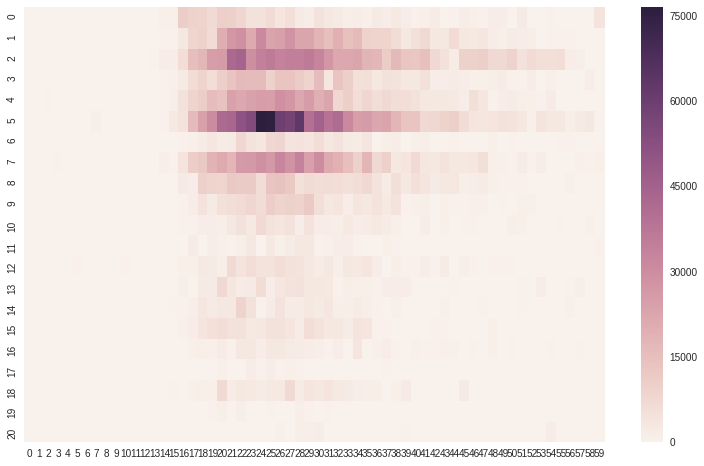

In [ ]:
# 转换注册时间
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'],format="%Y%m%d")
df['expiration_date'] = pd.to_datetime(df['expiration_date'],format="%Y%m%d")
days = df.expiration_date - df.registration_init_time
days = [d.days for d in days]
df['days']=days

# 注册天数的分布
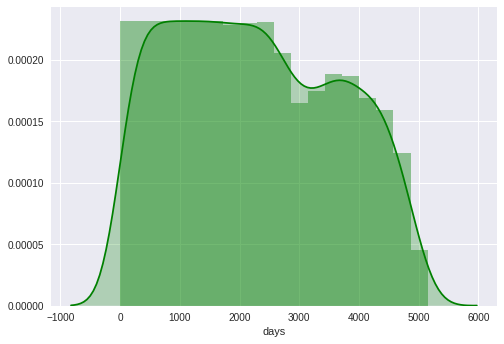

# 流派genre_ids分布
- 【IMPORTANT NOTE】：a song can have multiple genres
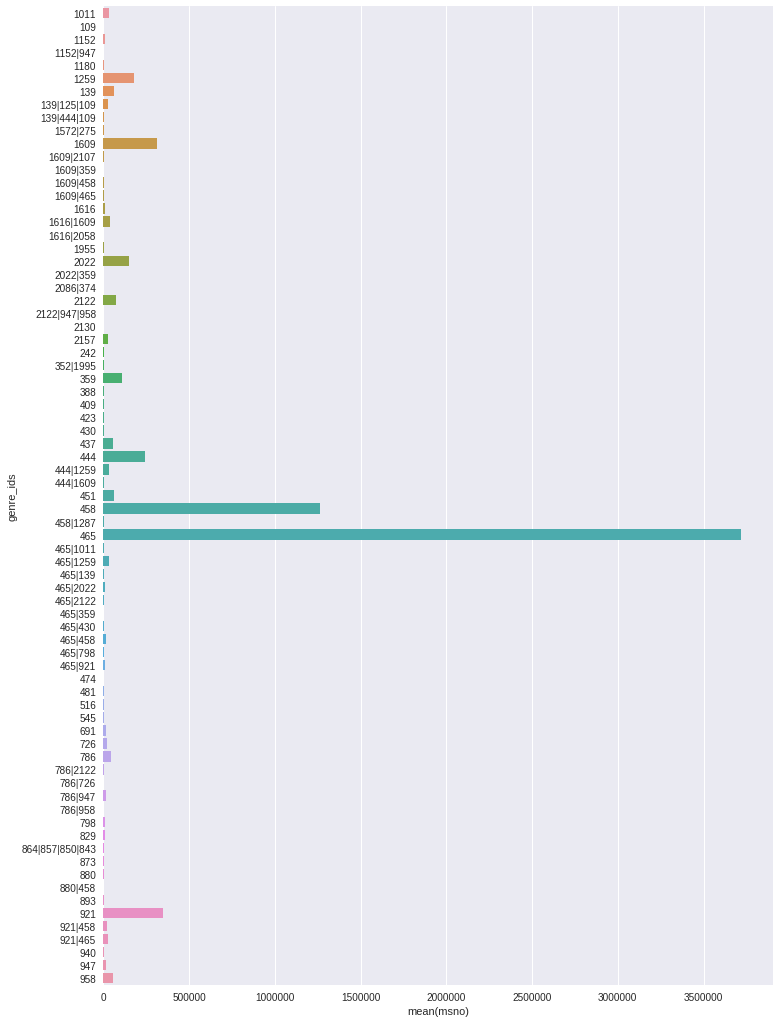

# source type
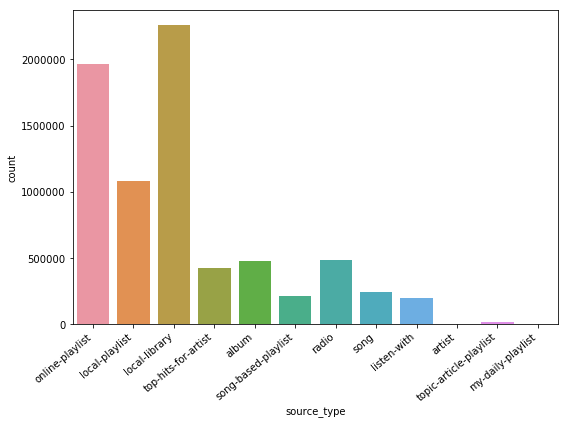

# source_screen_name
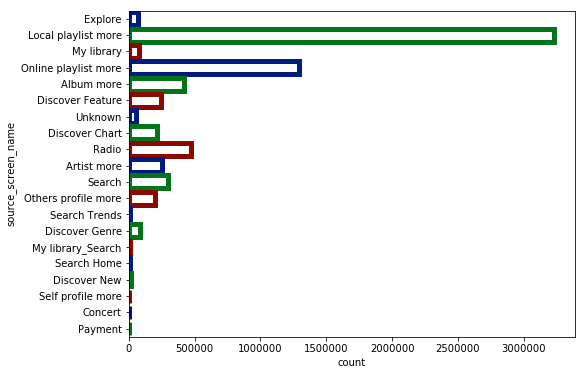

# source_system_tab
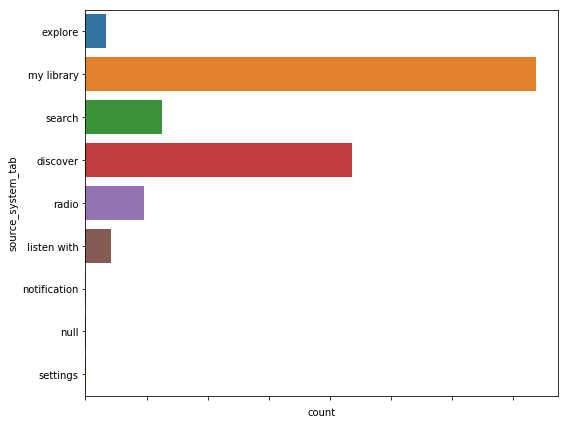

# 语言分布
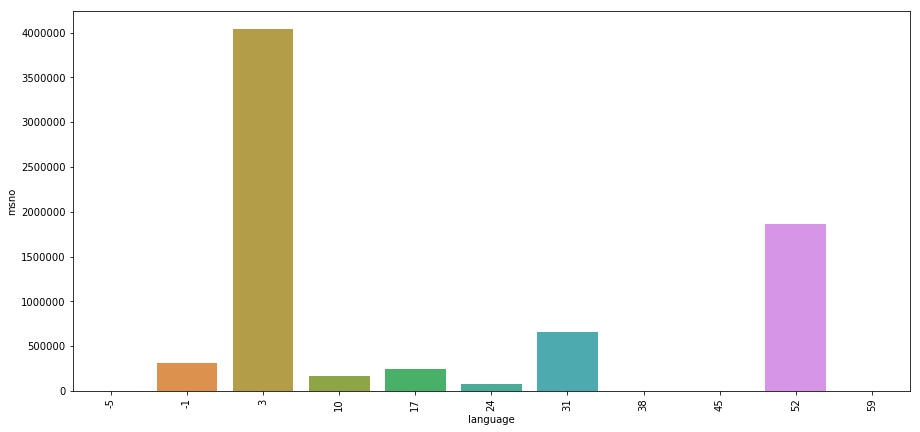

# Merging dataframes:
- Merge df_train and df_songs based on song_id.
- Merge the resulting dataframe with df_members based on msno.

In [1]:
df_train_members = pd.merge(df_train, df_members, on='msno', how='inner')
df_train_merged = pd.merge(df_train_members, df_songs, on='song_id', how='outer')

NameError: name 'pd' is not defined

https://www.kaggle.com/kunstmord/exploring-the-songs

https://www.kaggle.com/plainsailing/exploring-the-songs-ff60c2/editnb

In [ ]:
songs_in_train_and_test = np.intersect1d(train['song_id'].unique(), test['song_id'].unique())
print(train['song_id'].nunique(), test['song_id'].nunique())

train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids',
                                       'language']], on='song_id')

In [ ]:
# how many listens and repeat listens they get.
listen_log = train[['msno','song_id','target']].merge(songs,on='song_id')

listen_log_groupby = listen_log[['song_id', 'target']].groupby(['song_id']).agg(['mean',
                                                                                 'count'])
listen_log_groupby.reset_index(inplace=True)
listen_log_groupby.columns = list(map(''.join, listen_log_groupby.columns.values))
listen_log_groupby.columns = ['song_id', 'repeat_play_chance', 'plays']  #rename columns

song_data = listen_log_groupby.merge(songs, on='song_id') # merge song data with computed values

song_data['repeat_events'] = song_data['repeat_play_chance'] * song_data['plays']

x_plays = []
y_repeat_chance = []
for i in range(1,song_data['plays'].max()+1):
    plays_i = song_data[song_data['plays']==i]
    count = plays_i['plays'].sum()
    if count > 0:
        x_plays.append(i)
        y_repeat_chance.append(plays_i['repeat_events'].sum() / count)

# 歌曲播放总数与重复听的概率关系
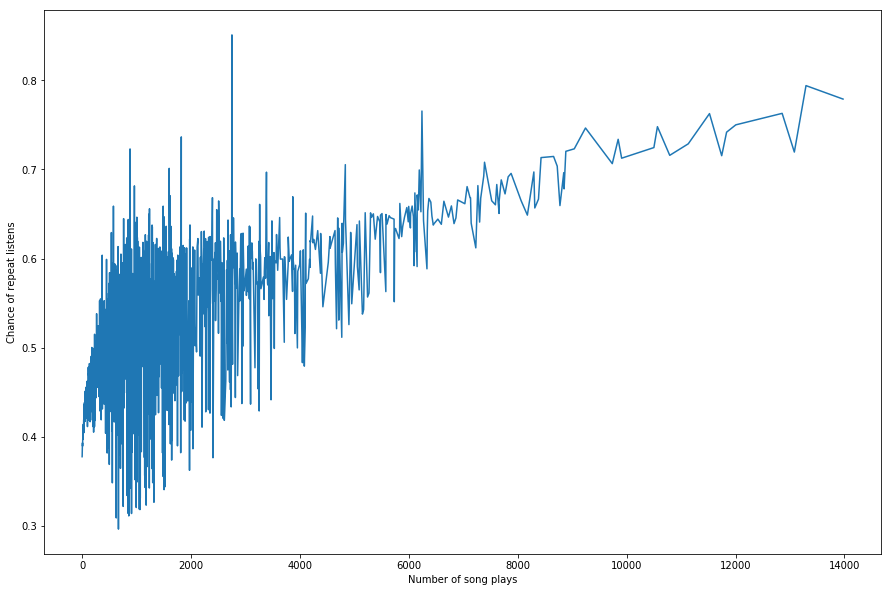

# 流派数量对重复听的次数有一定的影响，很多歌都有不少作曲家和词作家
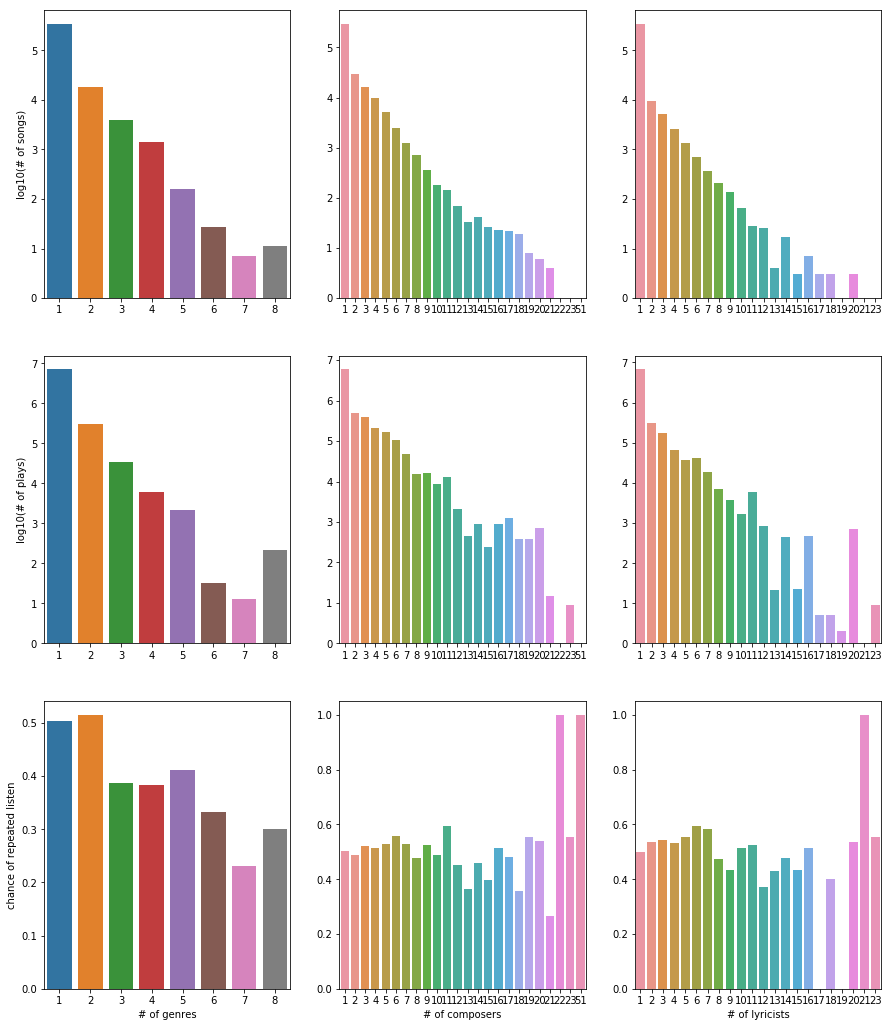

# 总共10个语言
- Seems like languages "-1", "17" and "45" lead to a lower chance of repeated listens (language "38" does that too, but there are only 100 songs in it, which in total haven't received a lot of plays too). Let's now take a closer look at the song length.
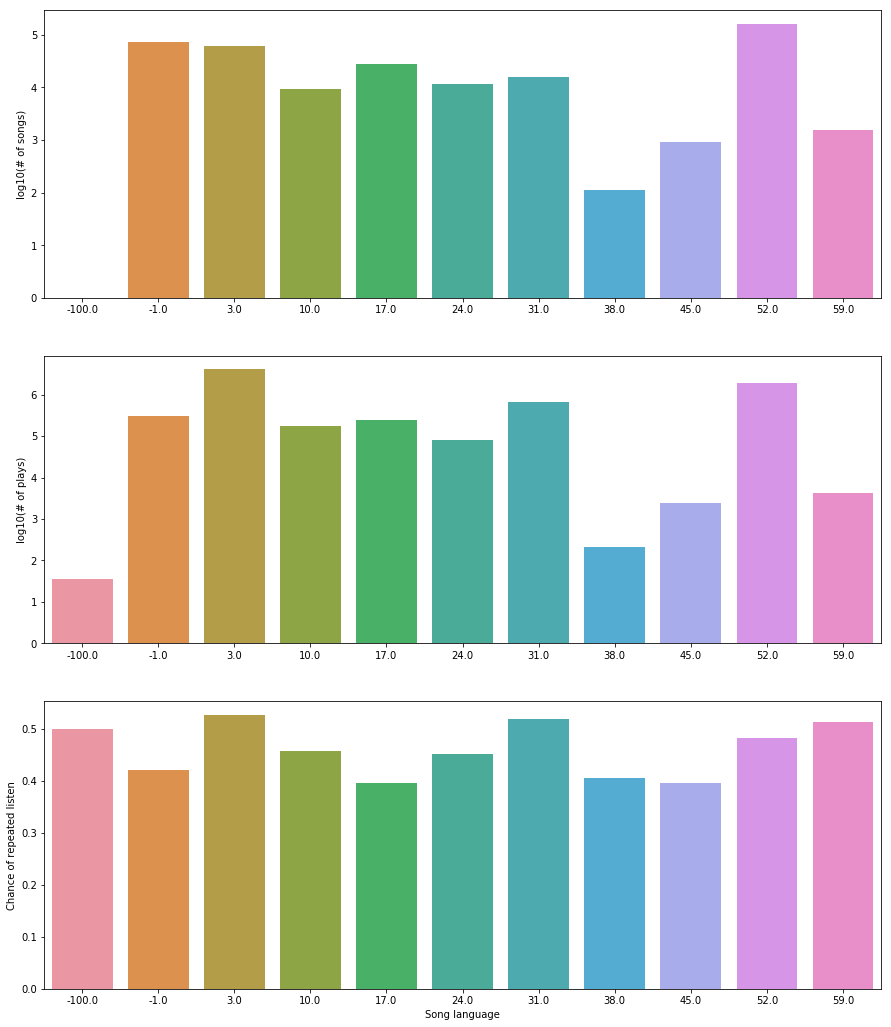                                                                        

# 音乐长度分布
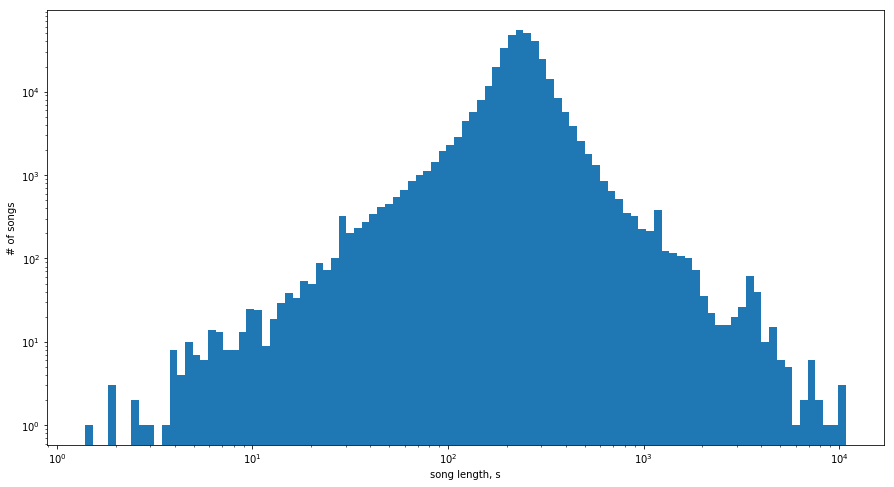

# 歌曲长度（对数尺度）与重听次数的关系
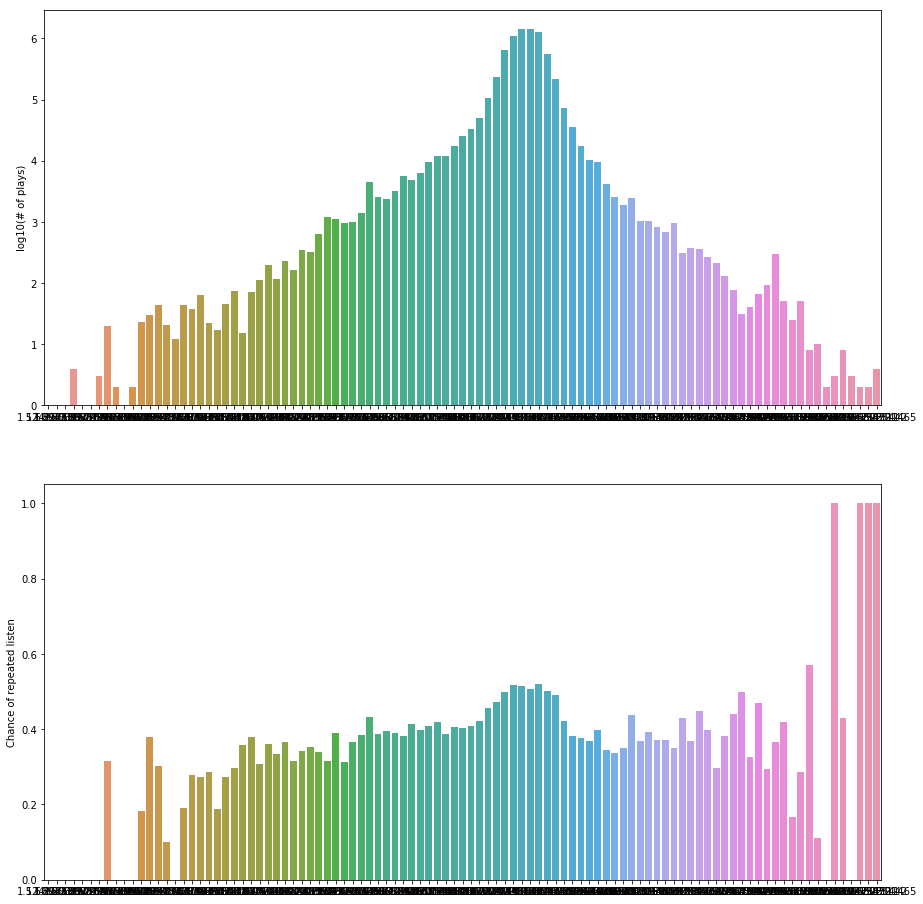
# 上图二者比值
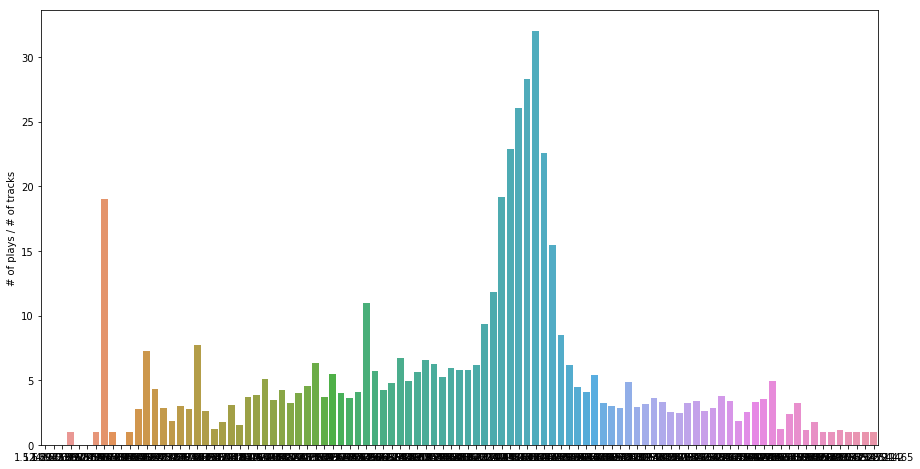

# 有不同数量track的作家数目，很多作家只有一首曲子
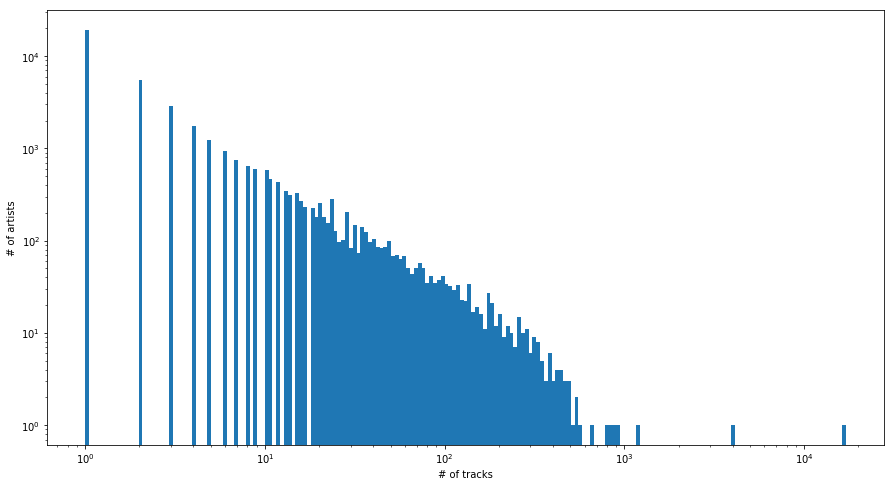
# 有不同播放次数的作家数目，很多作家的曲子只被播放过几次
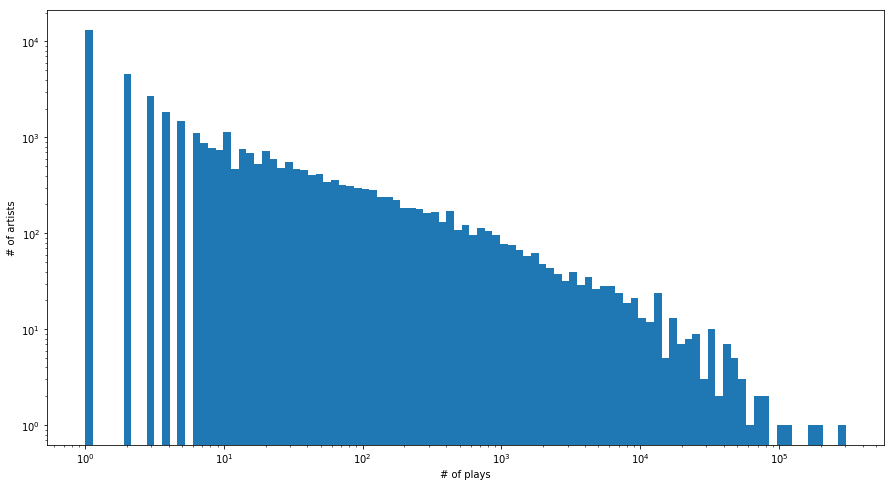
- the number of plays and number of tracks is an artist has is probably quite correlated. How does these variables correlate with the chance of repeated listens (as in - how does the number of songs an artist have affect the chance of his songs being played repeatedly; and how does the number of plays an artist has received affect the chance of his songs being played repeatedly).

# 关注左右两个峰值，有些作家一次也不会被重听，有些作家会几乎必然被重听
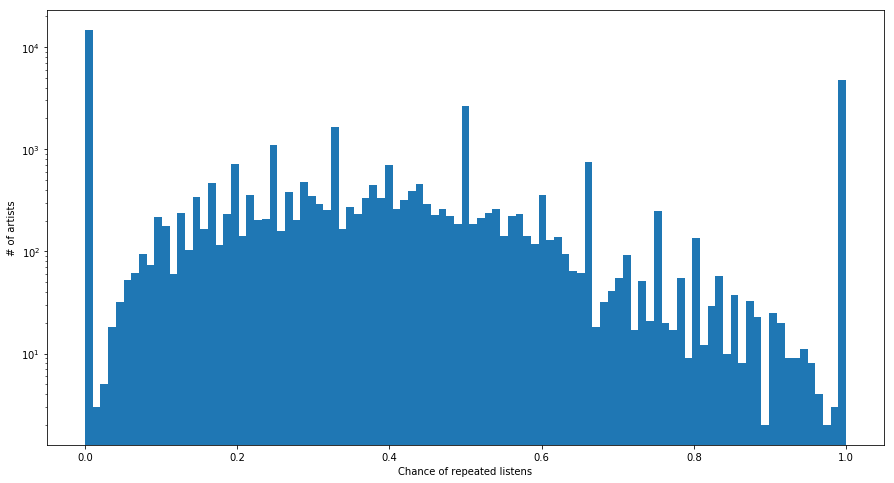

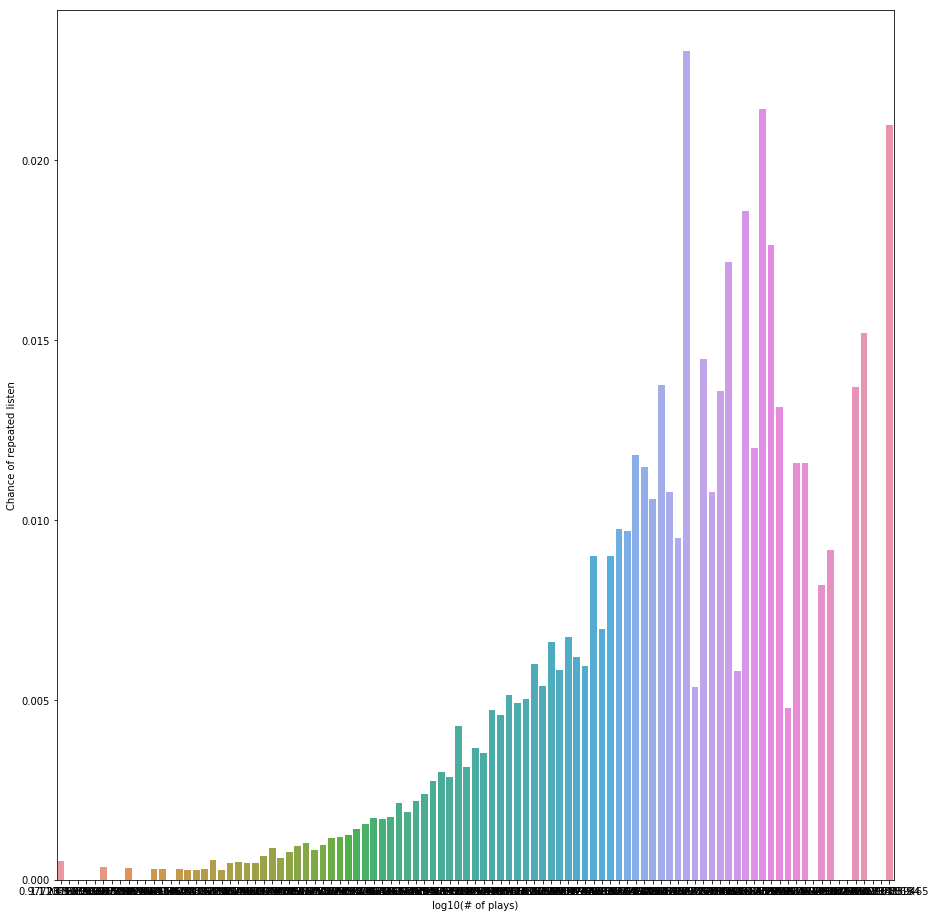
- So it looks like artists with a lower number of plays also have a lower chance of repeated listens, whereas when the number of plays increases, the data behaves more erratically.

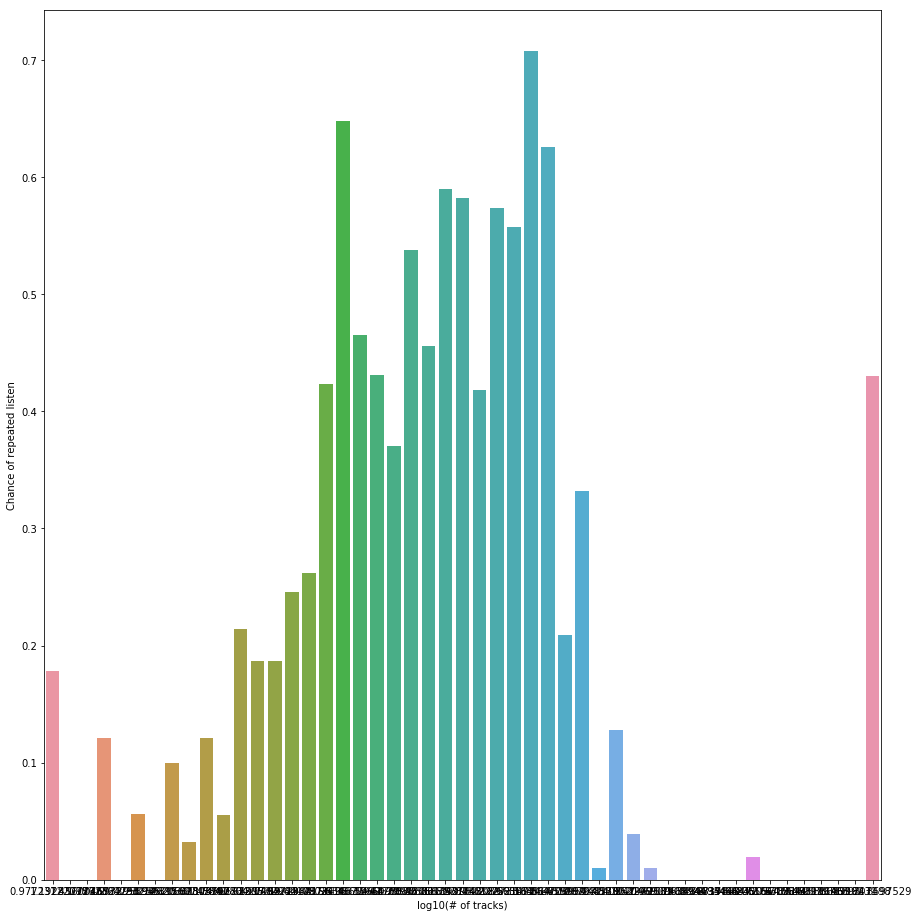
- So seems like there's a lot of variance – some artists with a low number of tracks have a high replay chance, other's dont. And there's "Various Artists", of course, which have the largest number of tracks but cannot be representative, of course. But in general, a very low number of tracks leads to a lower replay chance.

- So, what about the number of languages an artists writes songs in, does that affect anything?
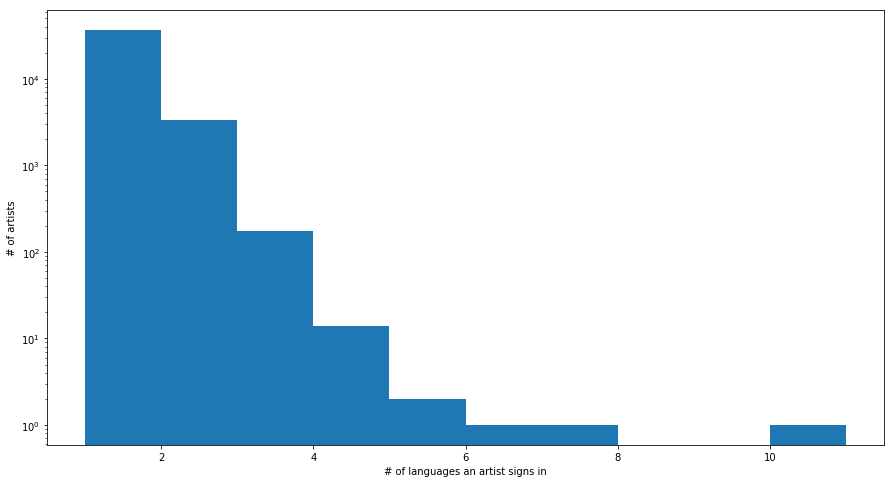

- So there's more than a 1000 artists that sing in 2 languages, and more than 100 that sing in 3 languages.

- But what's more interesting, is that there's not a lot of artists who sing in 4+ languages, but they do get a lot of plays. Also, those few artists who sing in 5 languages exactly, they do seem to have a lower replay chance.

- Side thought: perhaps it can be a good idea in the future to split "Various Artists" in 10 separate artists based on the language of the songs (or maybe do the same based on the number of genres. Or perhaps split them based on composer/lyricist. Probably all these approaches are worth trying, given that Various Artists account for a lot of the tracks).

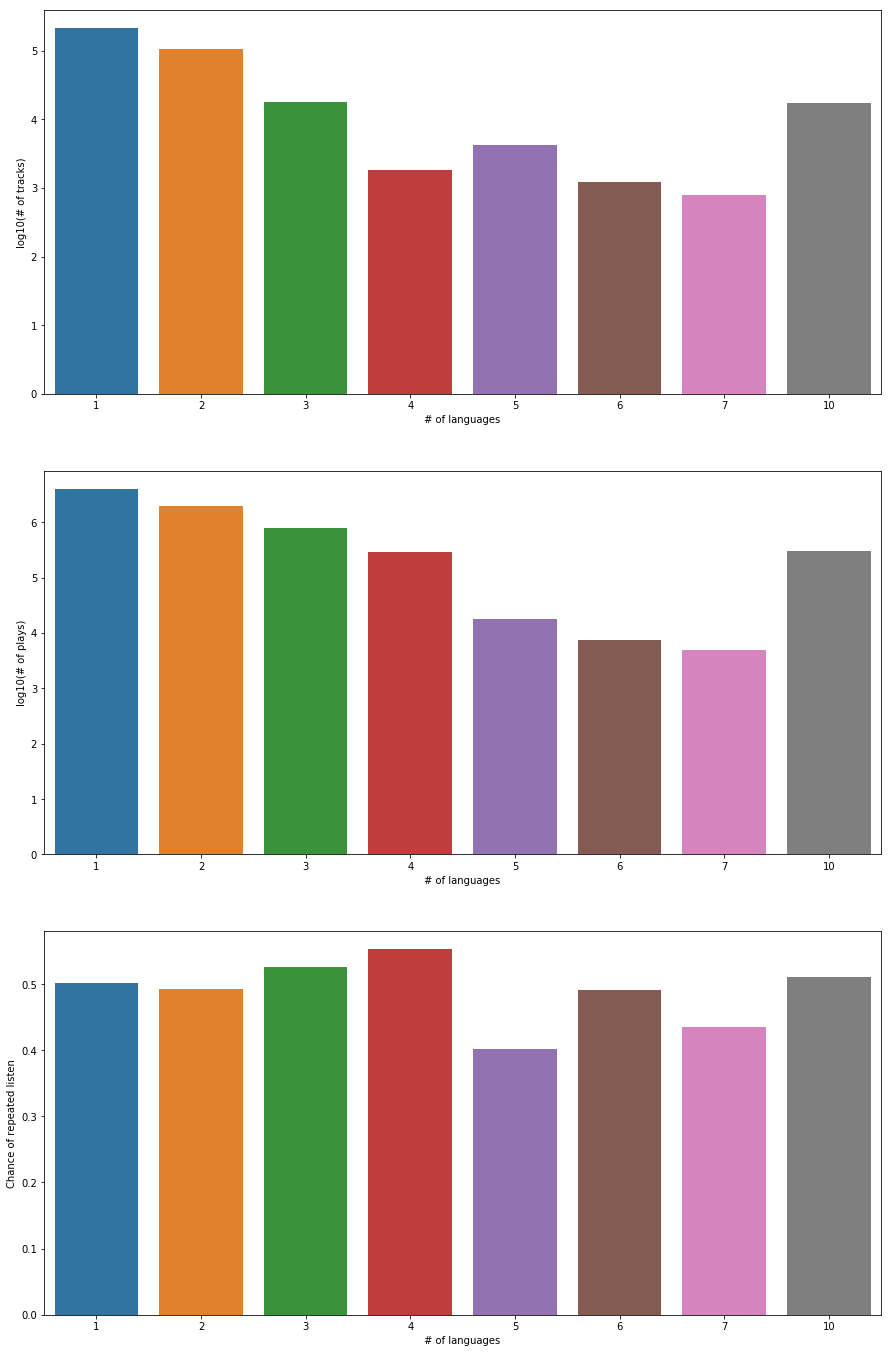

- So there's actually just 166 different genres + one "NaN genre"
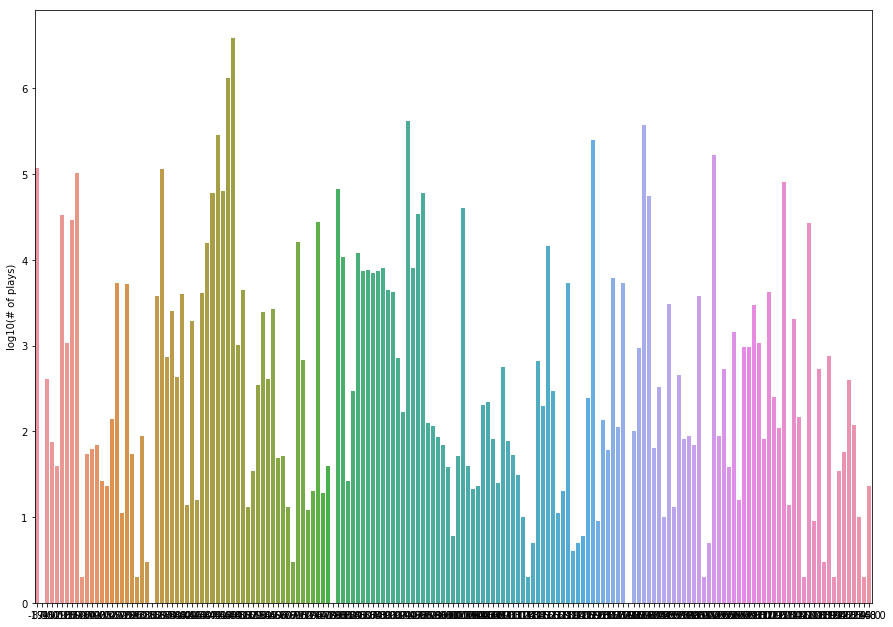
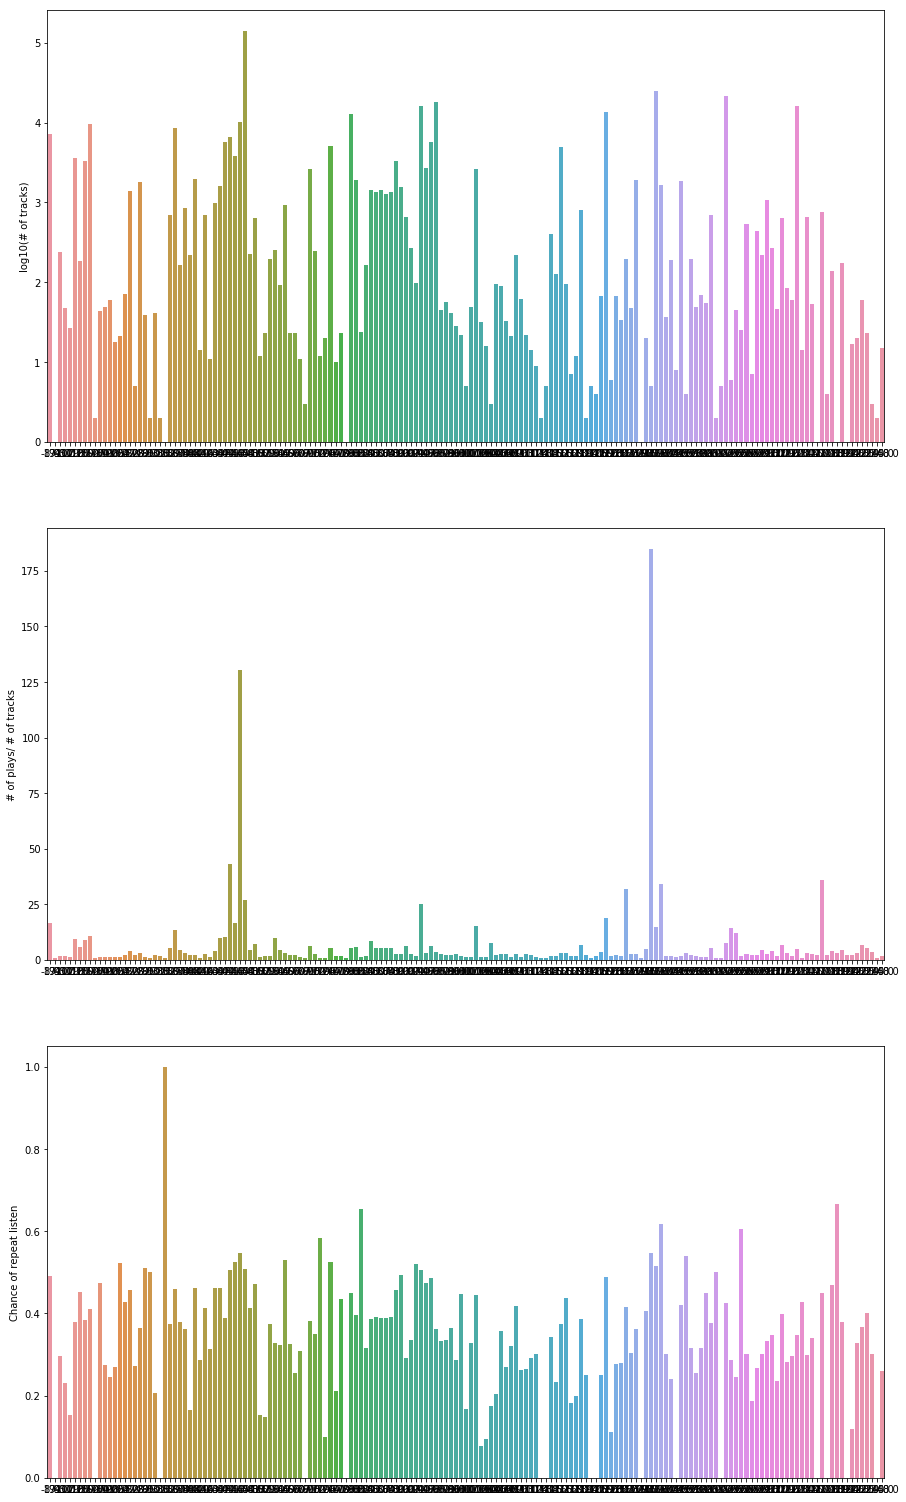

- 162 actual genres in the test set. 6 of these genres do no appear in the train set, just 18 of the songs (it might be less, since we didn't check for duplicate song id's) have genres that don't appear in the test set; perhaps the artists appear in the train set?
- Paul Simon and Lea Salonga have songs in the train set, we can use genre data from there (replacing these 'unknown' genres); we don't have any data for just 7 songs. Perhaps we can do something based on their language? Or length? But this probably won't have any noticeable effect on the results.

# Conclusion


## Summing this all up, some features that might be useful:

- Number of genres a song has
- Number of composers and lyricists a song has
- Number of plays a song has
- Number of tracks and plays the song's artist has
- The songs language
- The number of languages an artist sings in
- The song's length
- The genres a song has (these can be one-hot encoded, something has to be done for the genres that are in the test set but do not appear in the train set

## Further exploration/feature ideas that I haven't tested, but that could be useful:

- Split "Various Artists" into separate artists, based on language and/or genre of the tracks?
- Song length compared to the average song length of songs by the artist?
- Number of artists the songs composer and lyricist have worked with (a composer who writes 'hits' probably works with a lot of artists; but there seems to be some rubbish data in those fields, so maybe this feature is not that feasible after all for this data set)
- Genre pairs (if a song has genres 1,2,3, it has genre pairs (1,2), (2,3), (1,3) - perhaps these are informative too)
- Check whether the song is in an artists 'main' language (the most common language of the artists songs)
- Check whether the song is an artists 'main' genre (and also perhaps check if it's of a genre the artist doesn't usually perform in)

In [12]:
%%latex 
use Days instead of Dates
\[membership\_days = expiration\_date - registration\_init\_time\]

<IPython.core.display.Latex object>